In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("notebook",font_scale=1.2)

Scientific figures often contain multiple plots to make a point. Also while doing data analysis it makes sense to combine multiple plots into one figure. In matplotlib, this is acchieved with *subplots*. 

# Basic subplot syntax

Subplots are generated with the command `plt.subplots(nrow,ncol)` command, which returns a `figure` and a list of axes:

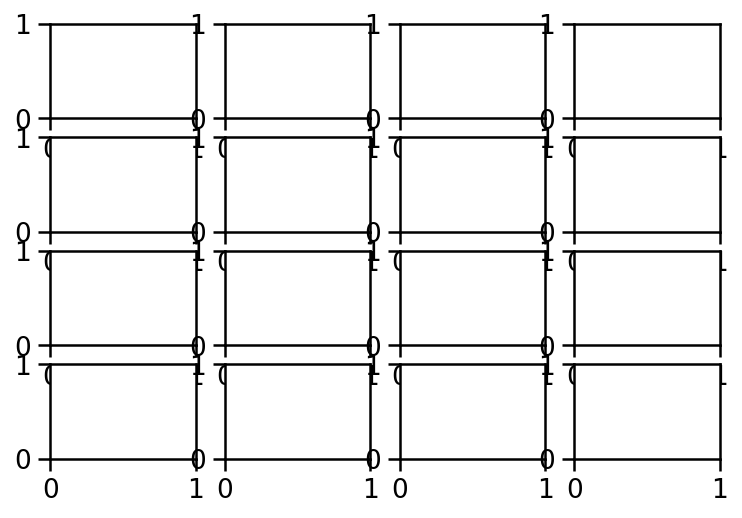

In [12]:
fig, axes = plt.subplots(4,4)

You may notice that this doesn't look nice; the plots are tiny and the ticks overlap. To fix the overlap, we call the command `plt.tight_layout()`:

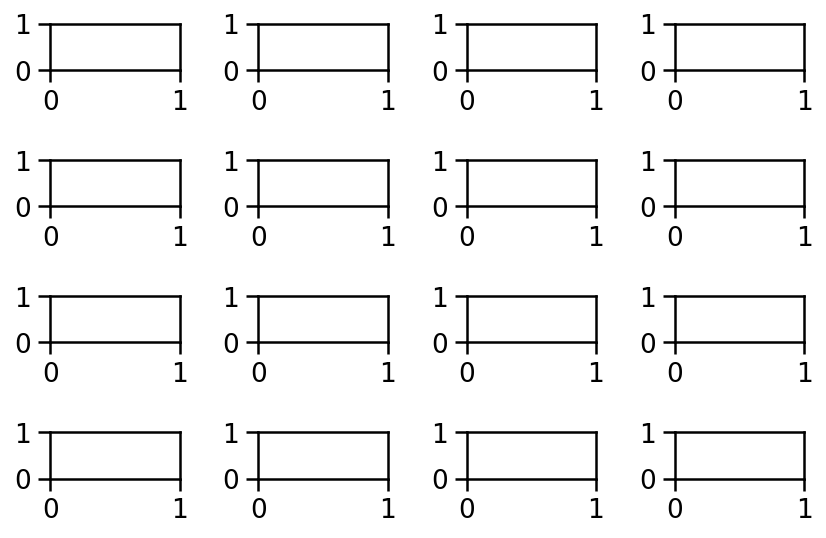

In [13]:
fig, axes = plt.subplots(4,4)
plt.tight_layout()

This command adds some whitespace, but it makes the plots even smaller. This happens because the size of the figure is fixed, so the only way to add whitespace is to make the plots smaller. 

As with `plt.figure`, `plt.subplots` has the option `figsize` to set the figure size. Use the `figsize` option to increase the figure size such that the plots have a decent size.

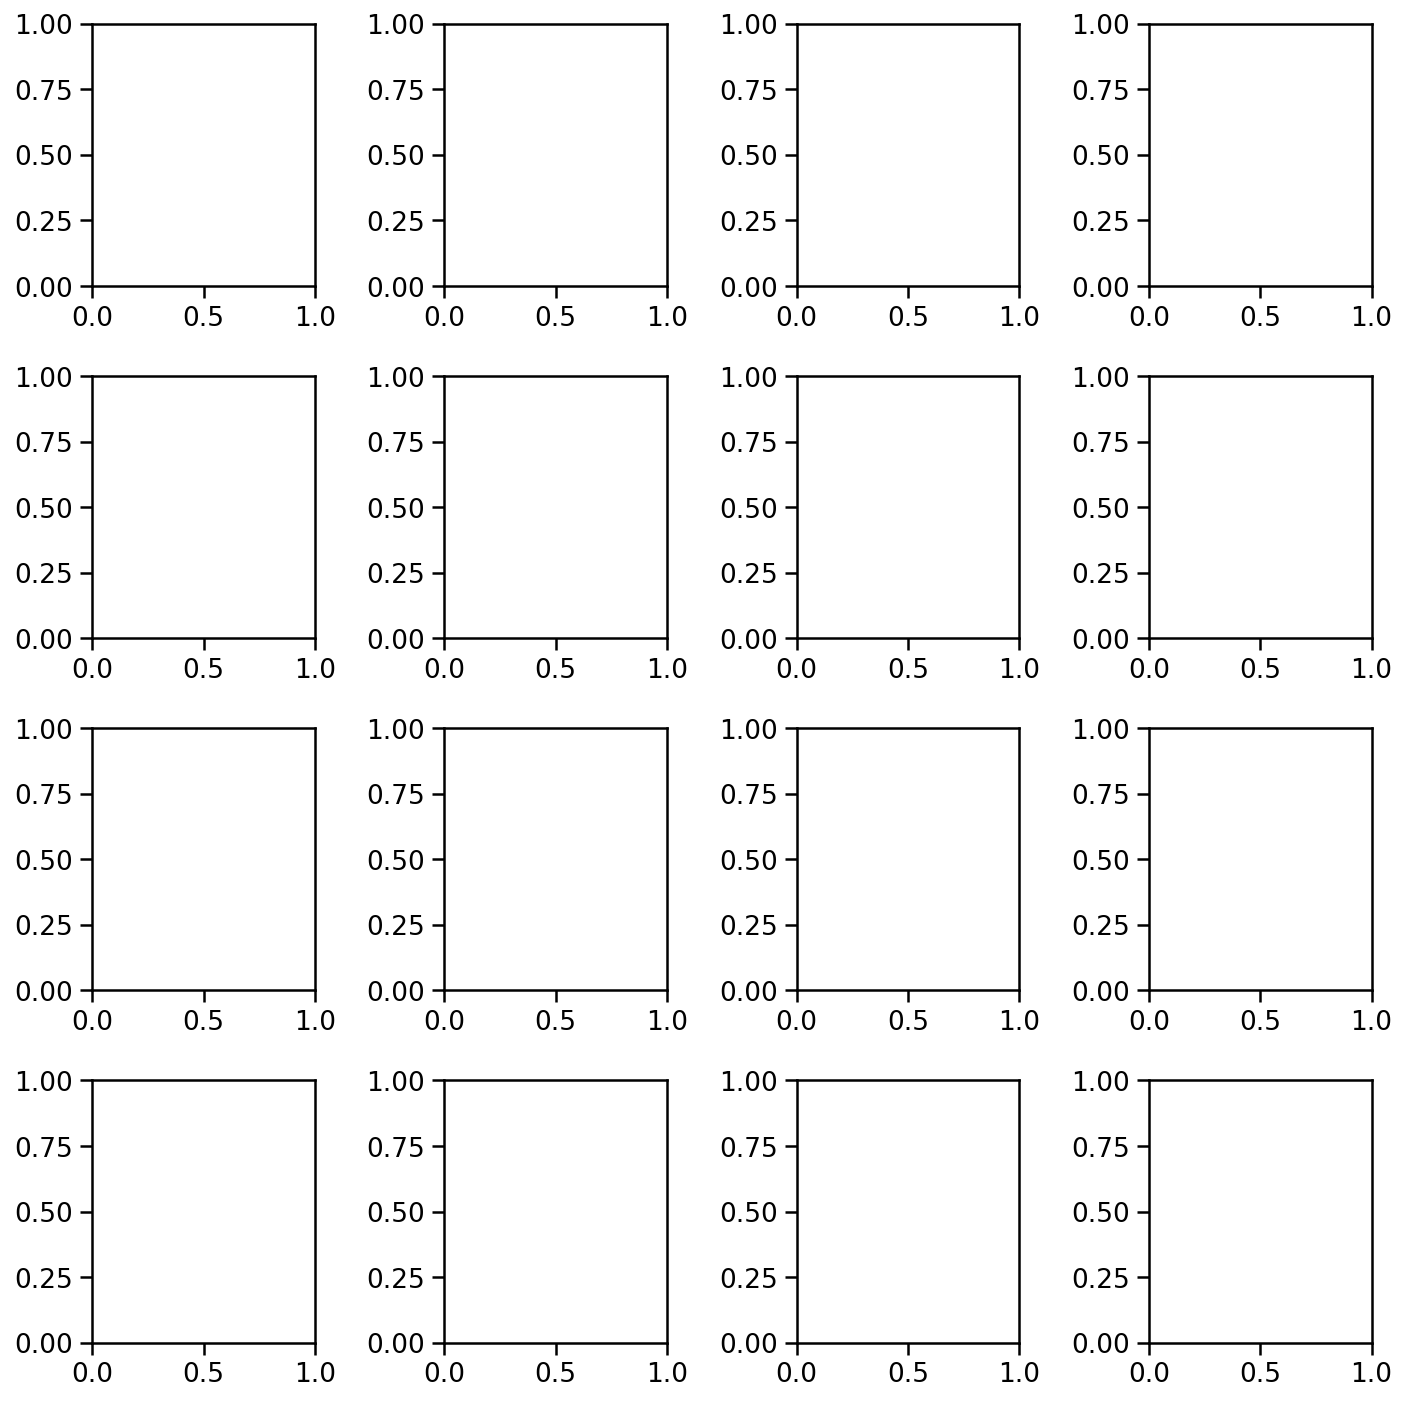

In [14]:
fig, axes = plt.subplots(4,4,figsize=(10,10))
plt.tight_layout()

You may have data that has similar x- or y-axes. Look in the documentation of `plt.subplots` to find out how to share x- and/or y-axes:

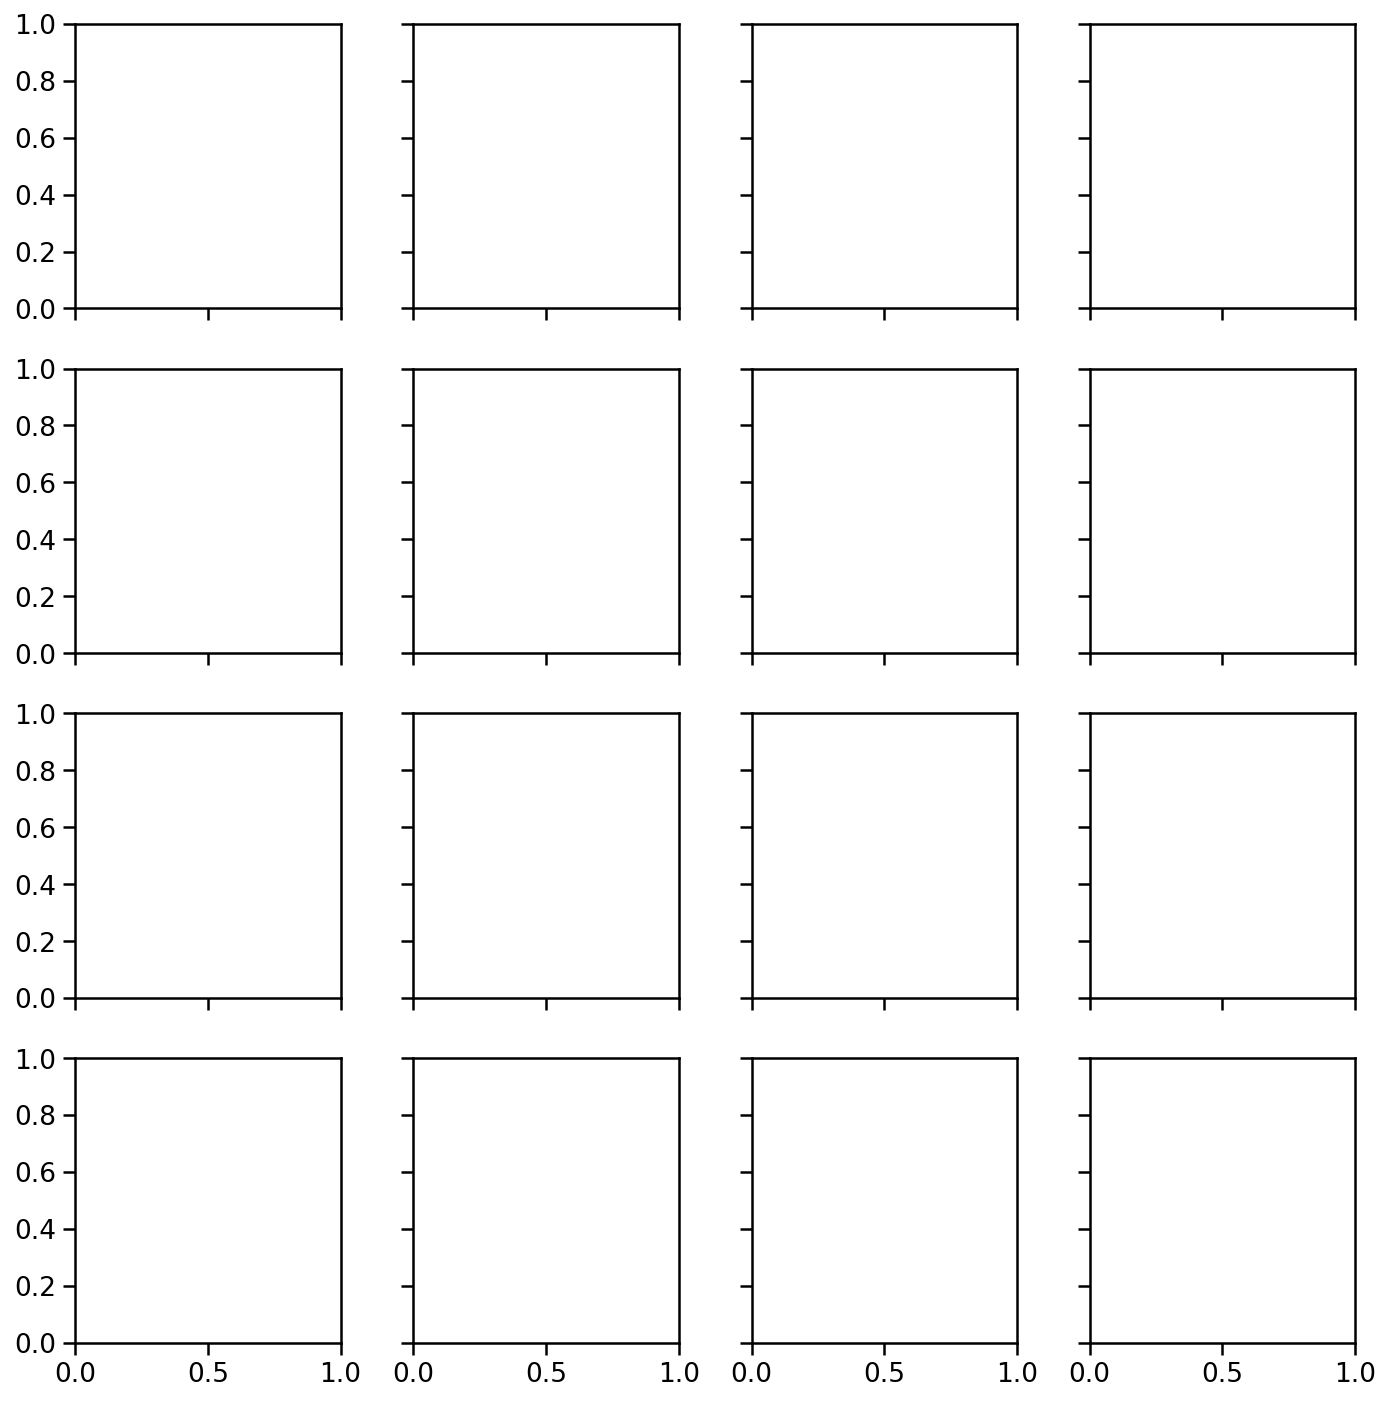

In [15]:
fig, axes = plt.subplots(4,4,figsize=(10,10),sharex=True,sharey=True)
plt.tight_layout()

# Populating subplots

When you create a figure with subplots you have a figure object and one axis object for each subplot. These axis objects are similar to the ones we created with `ax = plt.gca()`. Hence, to populate a subplot we need to get the axis object for the subplot we want to populate. Running `fig,axes = plt.subplots(nrow,ncol)` you get a figure and:
* a 2D array with axes if `nrow > 1` and `ncol > 1`;
* a 1D array otherwise if `nrow > 1` or `ncol > `;
* an axes object if `nrow = ncol = 1`.

So, the first subplot is:
* `axes[0,0]` if `nrow > 1` and `ncol > 1`;
* `axes[0]` if `nrow > 1` or `ncol > `;
* `axes` if `nrow = ncol = 1`.

Create a 2x2 subplot and give each subplot a title that describes its position, e.g. top left.

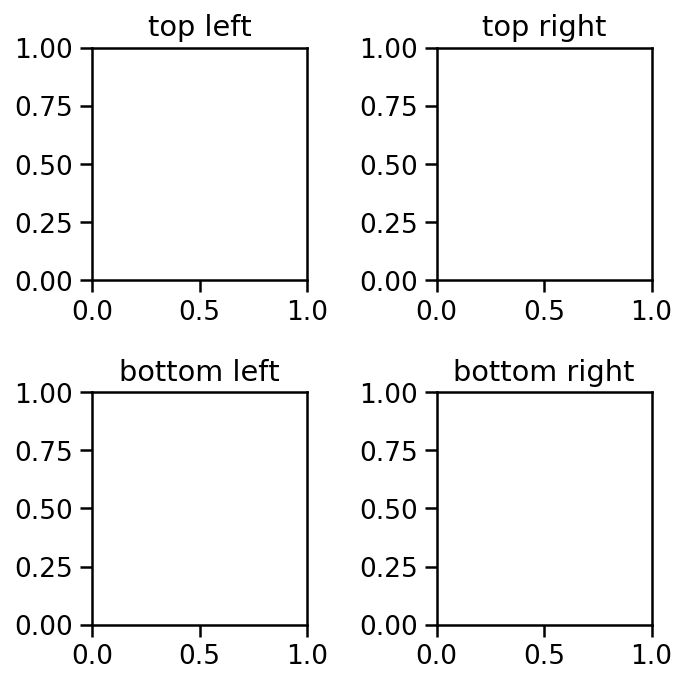

In [35]:
fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0,0]
ax.set(title='top left')
ax = axes[0,1]
ax.set(title='top right')
ax = axes[1,0]
ax.set(title='bottom left')
ax = axes[1,1]
ax.set(title='bottom right')       
plt.tight_layout()

Now, create a 2x2 subplot and fill it with the following plots:
* top left: $y = e^x$ (already done)
* top right: $y = x^2$
* bottom left: $y = 2x$ with errorbars of $y_\text{err} = .2x$
* bottom right: $y = \sin(x)$ as a bar chart

Add labels and titles to each plot.

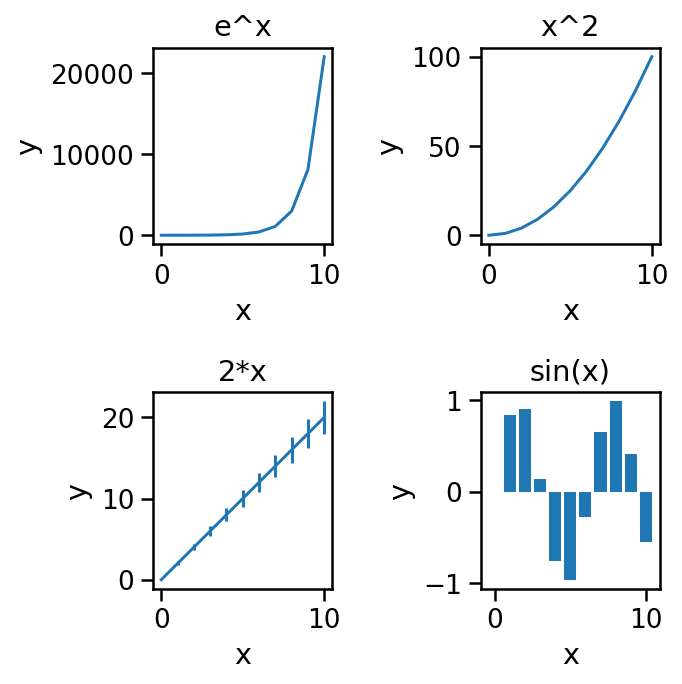

In [33]:
fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0,0]
x = np.linspace(0,10,11)
y = np.exp(x)
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title='e^x')
plt.tight_layout()

ax = axes[0,1]
y = np.power(x,2)
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title='x^2')
plt.tight_layout()

ax = axes[1,0]
y = 2*x
yerr = .2*x
ax.errorbar(x,y,yerr=yerr)
ax.set(xlabel='x',ylabel='y',title='2*x')
plt.tight_layout()

ax = axes[1,1]
y = np.sin(x)
ax.bar(x,y)
ax.set(xlabel='x',ylabel='y',title='sin(x)')
plt.tight_layout()

Repeat the previous exercise, but now with for plots in a row (or a column, whatever you like).

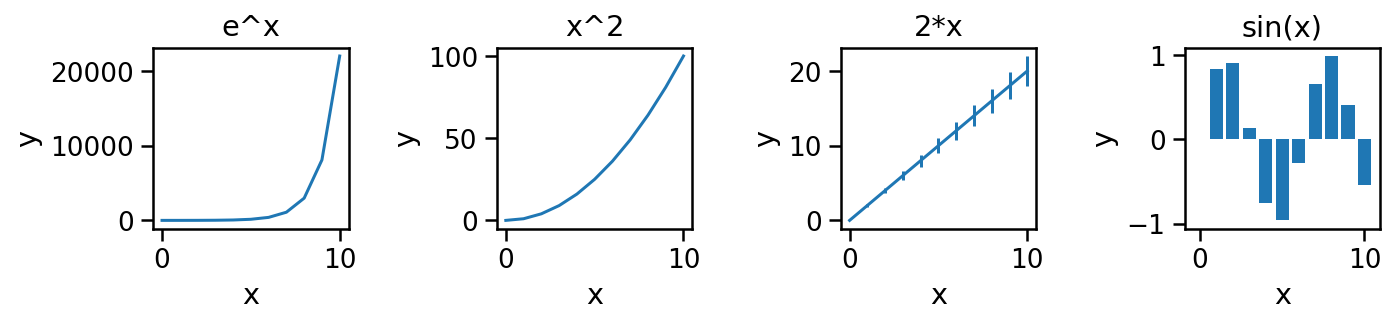

In [34]:
fig, axes = plt.subplots(1,4,figsize=(10,2.5))
ax = axes[0]
x = np.linspace(0,10,11)
y = np.exp(x)
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title='e^x')
plt.tight_layout()

ax = axes[1]
y = np.power(x,2)
ax.plot(x,y)
ax.set(xlabel='x',ylabel='y',title='x^2')
plt.tight_layout()

ax = axes[2]
y = 2*x
yerr = .2*x
ax.errorbar(x,y,yerr=yerr)
ax.set(xlabel='x',ylabel='y',title='2*x')
plt.tight_layout()

ax = axes[3]
y = np.sin(x)
ax.bar(x,y)
ax.set(xlabel='x',ylabel='y',title='sin(x)')
plt.tight_layout()

# Advanced subplots

* Create subplot based on length of list of columns to plot
* Use a loop to fill each plot
    * line or barchard with error bars
    * use `groupby`